# Introduction to Python - Numpy
## Problem Set

In [2]:
# Authors: Matthias Huber (huber@ifo.de), Alex Schmitt (schmitt@ifo.de)

import datetime
print('Last update: ' + str(datetime.datetime.today()))

Last update: 2017-05-11 10:40:18.849482


## Question 1
(a) Create random vector with five elements and print the average of the vector. Then, replace the maximum value by 0 and print the vector and its average again.

(b) Use NumPy's **random** package to get **N** draws from a standard normal distribution (google to get the name of the corresponding function and its syntax!) and store them in a NumPy array. Find the sample average and standard deviation for **N = 10**, **N = 1000** and **N = 1000000**.

(c) For the last case in question (a) with **N = 1000000**, use an index array or Numpy's **where** function to find the share of draws that is either less than -1.96 or greater than 1.96. What's your expectation what this share should be?

(d) Create a two-dimensional 4-by-4 NumPy array **A** with elements from 1 to 16. A quick way to do is using Python **range** function and the **shape** method of NP arrays. Recall from linear algebra that multiplying any matrix with the identity matrix **I** just results in same matrix (i.e. $I \cdot A = A \cdot I = A$). Confirm this using your array **A**. What happens if you multiply **A** with an array of the same dimension that consists only of 1s?

(e) Write a function **get_diag** that takes a *square* matrix of dimension **n** and returns a flat array of length **n** that contains the elements on the matrix' diagonal. The first thing the function should do is checking if the input is a square array and give an error message otherwise. You could this in many ways; one neat option is an **assert** statement (check the documentation!). Alternatively, you could use a print statement and interrupt the function with **Return None**.

In [3]:
import numpy as np

In [5]:
## question (a)
import random
A = np.zeros(5)
for i in range(5):
    A[i] = random.random()
# A=np.random.uniform(0,1,5) #Alternative
print(A)
print(A.mean())
A[A.argmax()]=0
print(A)
print(A.mean())

[ 0.54494272  0.50158068  0.88406743  0.83245561  0.92555203]
0.73771969344
[ 0.54494272  0.50158068  0.88406743  0.83245561  0.        ]
0.552609287061


In [6]:
## question (b)
N = [10, 1000, int(1e+6)]

for item in N:
    A = np.random.normal(0, 1, item)
    ave = A.mean() 
    dev = A.std()
    print("For N = {}, the mean is {} and the standard deviation is {}.".format(item, ave, dev))

For N = 10, the mean is -0.27116521256911585 and the standard deviation is 1.2311398811640943.
For N = 1000, the mean is -0.0343423002039743 and the standard deviation is 0.9926362362745074.
For N = 1000000, the mean is 0.0006999334455114771 and the standard deviation is 1.000659406230116.


In [7]:
## question (c)

N = int(1e+6)
## use a combination of two index arrays
A_sub = A[(A > 1.96) | (A < - 1.96)] 
## find share of complete sample
x = len(A_sub) / N

## alternative here:
# x = len( A[A > 1.96] ) + len( A[A < - 1.96] ) / N

print("The share of draws less than -1.96 or greater than 1.96 is {}.".format(x))

The share of draws less than -1.96 or greater than 1.96 is 0.050346.


In [8]:
## question (d)

## create matrix A
A = np.array(range(1, 17))
A.shape = (4,4)
## create identity matrix and ones matrix
I = np.eye(4)
E = np.ones(4)
## multiplying with identity matrix returns A
print(I @ A)
print(A @ I)
## multiplying with ones matrix returns row and column sums, respectively
print(E @ A) 
print(A @ E) 

[[  1.   2.   3.   4.]
 [  5.   6.   7.   8.]
 [  9.  10.  11.  12.]
 [ 13.  14.  15.  16.]]
[[  1.   2.   3.   4.]
 [  5.   6.   7.   8.]
 [  9.  10.  11.  12.]
 [ 13.  14.  15.  16.]]
[ 28.  32.  36.  40.]
[ 10.  26.  42.  58.]


In [9]:
## question (e)

def get_diag(A):
    
    assert A.shape[0] == A.shape[1], "The matrix must be square!"
    
    ## Alternative:
#     if not A.shape[0] == A.shape[1]:
#         print("The matrix must be square!")
#         return None
    
    n = A.shape[0]
    D = np.zeros(n)
    
    for ind in range(n):
        D[ind] = A[ind, ind]
    
    return D

print(get_diag(A))

## test with a non-square matrix
B = np.array([[1,2,3]])
print(get_diag(B))

[  1.   6.  11.  16.]


AssertionError: The matrix must be square!

## Question 2

Consider the polynomial expression
\begin{equation*}
	p(x) = a_0 + a_1 x + a_2 x^2 + \cdots + a_N x^N = \sum_{n=0}^N a_n x^n,
\end{equation*}
where $x$ is a scalar number.

(a) Write a Python function **poly(x, coeff)** that implements $p(x)$ (i.e. evaluates the polynomial) given a point **x** and a list of coefficients **coeff** ($= a_0,...,a_N$). Use a loop with **enumerate()**.

(b) Write a new function **poly_np(x, coeff)** that does the same job, but uses NumPy arrays and vectorized operations, rather than any form of Python loop. Hint: Use **np.cumprod()**.

(c) Using **%time**, check how long it takes for both functions to run when **len(coeff)** = 50000 (you can use arbitrary values for the elements in **coeff**).


#### (a)

As an example, let's compute $p(x) = 1 + 2x + 4x^2$ at $x = 2$, which gives $p(2) = 21$. Using **enumerate()**, the loop is straightforward:

In [10]:
def poly(x, coeff):
    # initialize s as 0
    s = 0
    for (i, a) in enumerate(coeff):
        # for each iteration, add the corresponding term to s
        s = s + a * x**i
        
    return s

poly(2, [1,2,4])

21

Note that we can implement the exact same algorithm in one line:

In [26]:
# def poly(x, coeff):
#     return sum(a * x**i for i, a in enumerate(coeff))

# poly(2, [1, 0,1,0,1])

#### (b) 

Using **np.cumprod()** on a sequence gives an array where at each position, you have the product of all elements that come before or at that position in the original array. For example, **np.cumprod([2,3,4,5])** would return **[2,6,24,120]** as a NP array. For the function here, we need to apply **np.cumprod()** on an array **[1, x, x, x, ..]**, which would return **[1, x, x^2, x^3,...]**. We can use the inner product of this array and **coeff**.

In [12]:
import numpy as np
def poly_np(x, coeff):
    # define X = [1 x x ...]
    X = np.empty(len(coeff))
    X[0] = 1
    X[1:] = x
    # using cumprod on X gives [1 x x^2 x^3 ...]
    y = np.cumprod(X)
    # compute and return inner product
    return coeff @ y

poly_np(2, [1,2,4])

21.0

As an alternative, note that a vectorized operations also works if *the array is in the exponent*. In other words, implementing something like $x^{(0,1,2)}$ in Python, where $x$ is a scalar, would give $(x^0, x^1, x^2)$. Again, this works only if the sequence $(0,1,2)$ is a NumPy array. 

In [11]:
def poly_np2(x, coeff):
    return coeff @ x**np.linspace(0,len(coeff)-1,len(coeff))

poly_np2(2, [1,2,4])

21.0

#### (c) 

In [14]:
# use random module to assign arbitrary values to coeff
N = 50000
coeff = np.random.uniform(0, 1, N)
x = 0.1

With 50000 elements in **coeff**, there are notable differences in the running times across the functions, with the **poly_np** function using **np.cumprod()** being by far the fastest - the difference compared to the loop-implementation in Vanilla Python is a factor of about 30 (depending on your computer!) -- another example for the speed of vectorized operations.

In [16]:
%time print(poly(x, coeff))
%time print(poly_np(x, coeff))
%time print(poly_np2(x, coeff))

0.86327450947
CPU times: user 24.5 ms, sys: 866 µs, total: 25.4 ms
Wall time: 24.5 ms
0.86327450947
CPU times: user 777 µs, sys: 202 µs, total: 979 µs
Wall time: 400 µs
0.86327450947
CPU times: user 12.2 ms, sys: 182 µs, total: 12.4 ms
Wall time: 3.16 ms


## Question 3

Compute an approximation to $\pi$ with the Monte Carlo method using **Numpy**. Your hints are as follows:
- If $U$ is a bivariate uniform random variable on the unit square $(0,1)^2$, then the probability that $U$ lies in a subset $B$ of $(0,1)^2$ is equal to the area of $B$.
- If $U_1,...,U_n$ are iid copies of $U$, then, as $n$ gets large, the fraction that fall in $B$ converges to the probability of landing in $B$
- Recall that for a circle, $area = \pi * radius^2$

(Source: lectures.quantecon.org, An Introductory Example, Exercise 3)

In [17]:
import numpy as np

# function throws gives the fraction of throws that land in the unit cycle = area of unit cycle 
def area(n):
    count = 0
    for i in range(n):
        x, y = np.random.uniform(0,1), np.random.uniform(0,1) # x-coordinate, y-coordinate
        if np.sqrt((x - 0.5)**2 + (y - 0.5)**2) <= 0.5:
            count += 1
    return count/n

pi = area(100000) / 0.5**2;
print(pi)
## for comparison
print(np.pi)


3.1388
3.141592653589793


## Question 4

In this question, you are asked to write your own implementation of the *bisection method* to compute the root of a real-valued function. Of course, most programming languages already have in-built implementations (e.g. in SciPy: **scipy.optimize.bisect**}, so writing your own function may seem a bit redundant. The goal here is to give you some idea about the inner workings of many of the algorithms used in scientific computing. The bisection method, while quite simple, captures two important features of most root-finding and optimization methods: it is a *local* method and it is based on an *iterative procedure*. 

- Recall that a root of a real-valued function $f$ is a value $x$ in the domain of the function such that $f(x)=0$. The idea behind the bisection method is based on the *Intermediate Value Theorem*: if $f$ is continuous and defined on the interval $[a,b]$, and if $f(a)$ and $f(b)$ are distinct values, then $f$ must assume all values in between. Since we are interested in where $f$ assumes the value 0, we need $f(a)$ and $f(b)$ to have different signs.
- The bisection method implements the following "pseudo-code":

(i) Start with two values $a$ and $b$ such that $f(a)$ and $f(b)$ are defined and have different signs. Moreover, specify a "tolerance level" $tol$ which should be a very small number, e.g. 1e-8.

(ii) Compute the midpoint between $a$ and $b$, $x = \frac{a + b}{2}$. 

(iii) If $f(x)$ has the same sign as $f(a)$, replace the left endpoint of the interval with $x$, i.e. $a = x$.

(iv) If $f(x)$ has the same sign as $f(b)$, replace the right endpoint of the interval with $x$, i.e. $b = x$.

(v) Repeat from (ii) until the absolute value of $f(x)$ is less than $tol$, i.e. $|f(x)| < tol$.

- Bisection is an *iterative procedure*: at the beginning of each iteration step, the interval $[a,b]$ contains a root of $f$. The interval is then divided ("bisected") into two subintervals of equal length. One of the two subintervals must contain the root, and hence have endpoints of different signs. This subinterval is taken as the interval $[a,b]$ used for the next iteration. This process continues until the resulting midpoint $x$ of the current interval is sufficiently close to 0.  
- Moreover, note that bisection is a *local* method: it will not give you all the roots of a function, but only one of the roots (in case there are multiple roots) between $a$ and $b$. A corollary of this is that the outcome of bisection (and of local methods in general) is sensitive to the starting point chosen by the user, here the values for $a$ and $b$.

Write a function **mybisect(f, a, b)** in Python that implements the pseudo-code above. Then, test it on the function 
\begin{equation*}
    f(x) = \sin(4 (x - 1/4)) + x + x^{20} - 1,
\end{equation*}
i.e. find a root of this function. Compare your result to what SciPy's in-built function returns (provided below). 

*Hint*: most modern programming languages have some type of **while**-loop, which will prove useful here. Moreover, in Python/NumPy, consider using the **abs()** and **np.sign()** functions.  



In [18]:
# function to use bisection on
def fun(x):
    return np.sin(4 * (x - 0.25)) + x + x**20 - 1


def mybisect(fun, a, b):
    """
    Implements the bisection method
    """
    # choose tolerance level
    tol = 1e-10
    # initialize d 
    d = 1
    # while-loop: iterate until d sufficiently small
    while abs(d) > tol:
        # find intermediate value between a and b
        x = (a + b)/2
        # evaluate function
        d = fun(x)
        # find new end points for interval [a,b]
        if np.sign(d) == np.sign(fun(a)):
            a = x
        elif np.sign(d) == np.sign(fun(b)):
            b = x
    
    return x

print(mybisect(fun,0,2))        

0.408293504267931


In [19]:
import scipy.optimize
print(scipy.optimize.bisect(fun,0,2))

0.4082935042797544


## Question 5

In this question, we are going to go through a very simple implementation of dynamic programming in Python. If you have never heard of dynamic programming before, don't worry - just follow along the instructions. 

As an application, recall the standard neoclassical growth model (Ramsey model) from your Macro classes. Suppose a social planner maximizes lieftime utility of a infinitely-lived, representative household: 
\begin{equation}
    \max \sum^\infty_{t = 0} \beta^t u(c_t) 
\end{equation}
s.t. 
\begin{equation}
    k_{t+1} + c_t = f(k_t) + (1 - \delta) k_t = k_t^\alpha + (1 - \delta) k_t. 
\end{equation}
In words, there is a single consumption good, which is produced using a single production factor, capital $k_t$, which is accumulated over time. $f$ denotes the production function, while $u$ denotes the utility function. To make things even more simple, assume that $u(c) = \log(c)$ and $\delta = 1$ (i.e. capital fully depreciates between two periods). 

Hence, we can write the planner's maximization problem more compactly in the following way: 
\begin{equation}
    \max_{k_{t+1}} \sum^\infty_{t = 0} \beta^t \log(k_t^\alpha - k_{t+1}). 
\end{equation}
This is an intertemporal optimization problem, maximizing an infinite sum. Under the particular assumptions made here, we can find an analytical solution to the problem, using a standard Lagrangian. The planner's *optimal decision rules* for investment and consumption are given by:
\begin{equation}
    k_{t+1} = \alpha \beta k_t^\alpha,\ c_t = (1 - \alpha \beta) k_t^\alpha.
\end{equation}
In other words, in every period a constant share $\alpha \beta$ of output is "saved", while the remaining share is consumed. 

The goal of this question is to find the same "policy function" numerically. As a side note, while the analytical solution just holds for the specific assumptions made above (Cobb-Douglas production function, log utility, full depreciation), the numerical approach used below works for general functional forms and less-than-full depreciation. 

(a) Start by writing two short Python function - **utility** and **prod** - that both take a single argument and implement the utility function and the production function given above. Note that they should work on both scalar values and Numpy arrays. 

In [1]:
## question (a)
import numpy as np

def utility(c):
    return np.log(c)

def prod(k):
    return k**alpha

(b) Next, we define a "grid" for the capital stock, i.e. an array of possible values that $k_t$ can take. Of course, the capital stock in this model is a *continuous* variable. However, we cannot really express continuous variables (with infinitely many values) on a computer, so we need to *discretize* them.

For this, assume that the capital stock always lies between two values, **k_min** and **k_max** (In other words, if the capital stock in period 0 is between these two values, it will not go outside of the interval, assuming that the planner behaves optimally). Of course, these bounds depend on the parameter values for $\alpha$ and $\beta$. Set **alpha** to 0.33 and **beta** to 0.95. Then, **k_min = 0.05** and **k_max = 0.25** will do the trick. Use Numpy's **linspace** function to create an array **k_grid** with **N** values for capital between these two bounds. For now, set **N = 100**.

In [13]:
## question (b)

alpha = 0.33
beta = 0.95

## steady state (not part of the question)
ks = (alpha * beta)**(1 / (1 - alpha))
print(ks)

## define grid for capital
k_min = 0.05
k_max = 0.25
N = 1000
k_grid = np.linspace(k_min, k_max, N)

0.17705807534879062


(c) The key insight of dynamic programming is the *Bellman equation*. In terms of the model above, it states that the following equation must hold for any (feasible) $k_t$:
\begin{equation}
    v(k_t) = \max_{k_{t+1}} \log(k_t^\alpha - k_{t+1}) + \beta v(k_{t+1})  
\end{equation}
$v$ is called the *value function*. To keep the question reasonably short, we skip the intuition behind this equation. 

We use the idea of the Bellman equation in a simple algorithm called *value function iteration* (again, we omit the discussion why this works, just believe us:). The main steps are the following.
1. Start with an initial guess for the value function, $v^0$. For simplicity, we're going to use $v^0(k) = 0$ for all $k$.
2. Given your current guess $v^n$ for the value function, solve the maximization on the right hand side of the value function and call it $v^{n+1}$:
\begin{equation}
    \max_{k_{t+1}} \log(k_t^\alpha - k_{t+1}) + \beta v^{n}(k_t)\ \rightarrow\ v^{n + 1}(k_t)
\end{equation}
3. Check if $v^{n+1}$ is sufficiently close to $v^n$ (more on this below). If not, use $v^{n + 1}$ as your new current guess and go back to 2. and repeat. If $v^{n+1} \approx v^n$, you have found an approximation $v^* $ of the "true" value function, with $v^* = v^{n+1}$.

The beauty of this algorithm is that it is guarantueed to converge (given that some conditions are satisfied, which they are here), i.e. *no matter your initial guess for the value function, you will always find a $v^{*}$* (and the algorithm will stop at $v^*$).

The above algorithm can be implemented numerically in many different ways, some better than others. One apect that distinguishes different methods is how to represent a function $v$ numerically. Here, in the simplest possible implementation, we represent $v$ *as a (one-dimensional) numpy array* of length **N**. The $i$th element of this array will give the value function for the corresponding element of **k_grid**: **v_i =** v(**k_grid_i**). 

Implement step 1 of the algorithm above, i.e. define a numpy array **v0** that contains only zeros (or any arbitrary value) as the initial guess.

In [14]:
## question (c): initial guess
v0 = np.zeros(N)

(d) Implement step 2 of the algorithm above. That is, for each element in **k_grid**, find $x$ (a floating point number) that satisfies
\begin{equation}
    \max_{x \in \mathbf{kgrid}} \log(\mathbf{k}_i - x) + \beta \mathbf{v0}
\end{equation}

One thing to note here is that we assume that our maximizer $x$ is also an element of **k_grid**. Hence, strictly speaking, we don't look for the overall optimal capital stock, but for the optimal capital stock *within the discrete set of grid points*.

The easiest way to implement this maximization is to loop through **k_grid** for the *current* capital stock, compute an array of possible values using **k_grid** as the set of possible *next-period* capital stocks, and use **np.max** to find the maximum value in this array. Since **v0** consists of only zeros, it can be ignored for now. 

Store the result of each iteration in a numpy array **v**. Print **v** and use eyeballing (or some numpy function like **diff**) to check that the elements in **v** are strictly increasing.

In [15]:
## question (d)
v = np.zeros(N)
for (ind, item) in enumerate(k_grid):
    v[ind] = np.max( utility(prod(item) - k_grid) + beta *v0 ) 
    
# print(np.diff(v))    

(e) Next, we need a metric to see how close the current guess of the value function, **v**, is to the old guess, **v0**. Since we essentially compare two vectors, we can use the standard vector norm:
\begin{equation}
 \epsilon = || v - v_0 || = \sqrt{ \sum_{i = 1}^N | (v_i - v_{0i})^2 }
\end{equation}
Numpy has a function **norm** in its **linalg** package that evaluates this. Use this (or your own implementation of the vector norm) to find **eps** (a scalar), a measure of closeness between **v** and **v0**. 


In [16]:
## question (e)
eps = np.linalg.norm(v0 - v)
print(eps)

## alternatives
# print( np.sqrt((v0 - v) @ (v0 - v)) )
# print( np.sqrt( np.sum( (v0 - v)**2 ) ) )

24.4772130061


(f) We can now implement the rest of the algorithm, using a **while** loop. In each iteration you should do three things:
1. given the current guess, **v_old**, get your new guess for the value function **v** using the same maximization procedure as in question (d);
2. measure the closeness **eps** between **v** and **v_old** using the vector norm, as in question (e);
3. update the current guess with the new guess for the next iteration: **v_old = v**. (Hint: You may want to use a copy of **v** here).

The **while** loop should run until **v** and **v_old** are reasonably close, i.e. until **eps** is almost zero (since this is an approximation, we will never get to **eps** being equal to zero!). A common "tolerance level" for **eps** is **tol** = 1e-8 = 0.00000001. In other words, stop the loop when **eps = tol**.

In [17]:
## question (f)
eps = 1
tol = 1e-8

## keep track of number of iterations
it = 0

v_old = v0
while eps > tol:
    it += 1
    v = np.zeros(N)
    ## get new guess
    for (ind, item) in enumerate(k_grid):
        v[ind] = np.max( utility(prod(item) - k_grid) + beta * v_old ) 
    ## measure closeness    
    eps = np.linalg.norm(v_old - v)
    if it % 50 == 0:
        print(eps)
    ## store new guess    
    v_old = v.copy()

2.46659263063
0.189791908981
0.0146035337443
0.00112366854291
8.64606482205e-05
6.65271245334e-06
5.11892754718e-07
3.93875662441e-08


(g) We now have the approximated value function, stored in array **v**. However, we are not done yet; what we are ultimately interested in is not the value function, but the policy rule for investment. Define a one-dimensional numpy array **k_pol** with length **N**. Then, run the **for** loop from the previous question again (only the inner **for** loop, not the outer **while** loop!), using **v** as your current guess. Instead of finding the maximum value with **np.max**, find the *position of the maximizer* using **np.argmax**. This gives you the index where the maximum value is attained. Use this index **max_ind** to fill **k_pol**, i.e. in iteration **it** of the **for** loop, **k_pol[it] = k_grid[max_ind]**. 

In [18]:
## question (g)
k_pol = np.zeros(N)
for (ind, item) in enumerate(k_grid):
    max_ind = np.argmax( utility(prod(item) - k_grid) + beta * v)  
    k_pol[ind] = k_grid[max_ind]   
    

(h) Use the figure below to compare your numerical solution with the "real" solution. We have plotted the analytical solution (you will learn how to create graphs like this in the next lecture). If you have found **k_pol**, uncomment the last line and run the cell. You should get a second curve which is a bit wobbly, which follows the blue curve.

The reason why the numerical solution is wobbly is that the quality of your approximation depends on the number of grid points. Above we have used **N = 100**, which is fairly small. Repeat the steps in questions (b), (c), (f) and (g), this time using **N = 1000** (the **while** loop will take a few seconds to finish). Now, the wobbliness should be gone, and the curves should lie almost on top of each other.

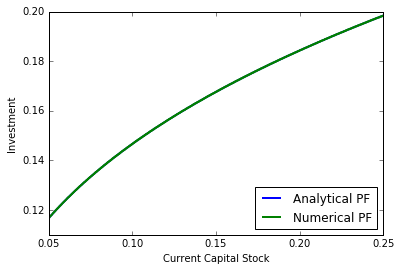

In [19]:
## question (h)
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots()
ax.plot(k_grid, alpha * beta * prod(k_grid), linewidth =2, label = "Analytical PF" )
ax.plot(k_grid, k_pol, linewidth =2, label = "Numerical PF" )
ax.set_xlim([0.05, 0.25])
ax.set_xlabel('Current Capital Stock')
ax.set_ylabel('Investment')
ax.legend(loc = "lower right")